# Analisis

### Importamos las librerias necesarias

In [45]:
import pandas as pd
import numpy as np

import sys as os

import pylab as plt
import seaborn as sns

%matplotlib inline

### Analisis de los datos

In [46]:
df = pd.read_csv('regression_data.csv')
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


Vamos a ver con que volumen de datos trabajamos

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

Como podemos ver tenemos 21597 datos por columna.

Vamos a ver cuantas columnas son de tipo numerico y cuantas de tipo objeto

In [48]:
print('Columnas numericas: ')
df.select_dtypes(include=np.number).columns

Columnas numericas: 


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [49]:
print('Columnas categoricas: ')
df.select_dtypes(include='object').columns

Columnas categoricas: 


Index(['date'], dtype='object')

### Limpieza de los datos

In [50]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

Como podemos ver no hay ningun nulo por lo que no va a hacer falta revisar esta parte de la limpieza de datasets


Sin mirar la correlacion entre los datos sabemos que hay columnas que son inutiles para el analisis por lo que serán eliminadas para una mayor eficacia del analisis

Antes de esto, hemos observado que "zipcode" puede ser algo muy importante, ya que nos dice donde está situada la casa, pero aun siendo numeros, no tienen porque tener ninguna relación con "price".
Dado esto, calculamos la media de cada zipcode y le añadimos esta columna al dataset.

In [51]:
df.groupby('zipcode')['price'].mean().sort_values(ascending=False)
df['zipcode_mean'] = df['zipcode'].map(df.groupby('zipcode')['price'].mean().sort_values(ascending=False))
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,zipcode_mean
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,310612.755725
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,469928.767726
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,462488.869258
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,551768.520913
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,685675.843537


In [52]:
# Codigo para la matriz de correlacion

#Codigo para ver correlacion de un dataset
def print_heatmap_corr(data:pd.DataFrame, annot:bool=True, cmap:str=None, 
                       mask:bool=True, save:bool=False, title:str=None)->None:
    
    '''
        Función que recibe un dataframe y devuelve la matriz de correlación en forma de mapa de color
        
        Parameters:
        -----------
        
        data: Dataset sobre el que queremos realizar la matriz de correlación
        annot: Si queremos mostrar el valor de la correlación en la matriz, default = True
        cmap: Paleta de colores que queremos usar para nuestro heatmap
        mask: Parámetro para mostrar solo la triangular inferior de la matriz de correlación
        save: Parámetro para salvar nuestro gráfico
        title: Título que queremos que lleve nuestro gráfico
    '''
    sns.set(style='white')     # estilo blanco hace que el fondo de la matriz sea transparente

    if mask: # Si mask es True
        mascara=np.triu(np.ones_like(data.corr(), dtype=bool))   # genera una mascara para tapar valores
    else:
        mascara = None # No aplicamos máscar

    if cmap: # Si le hemos pasado una paleta de colores
        c_map = sns.color_palette(cmap, as_cmap=True)
    else:
        c_map=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores por defecto

    plt.figure(figsize=(20,15))
    p = sns.heatmap(data.corr(), # aplica el método corr() a nuestro dataset
            mask=mascara, # aplica la mascara
            cmap=c_map, # aplica la paleta de colores
            vmax=1, # para establecer el valor máximo de valores
            center=0, # establece el centro de la paleta de colores
            square=True,
            linewidth=0.5, # para aplicar borde a los cuadros de la matriz
            cbar_kws={'shrink': 0.5}, # mostrar leyenda de colores
            annot=annot # mostrar valores de la matriz
           )
    p.set_title(title, fontsize=20)
    
    if save:
        try:
            plt.savefig(f'graphics/{title}.png')
        except:
            destino = input('No exite la carpeta de destino, introduce un nombre para la carpeta de destino: ')
            os.mkdir(destino)
            plt.savefig(f'{destino}/{title}.png')
    
    plt.show();

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17188\1752920887.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mascara=np.triu(np.ones_like(data.corr(), dtype=bool))   # genera una mascara para tapar valores
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17188\1752920887.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p = sns.heatmap(data.corr(), # aplica el método corr() a nuestro dataset


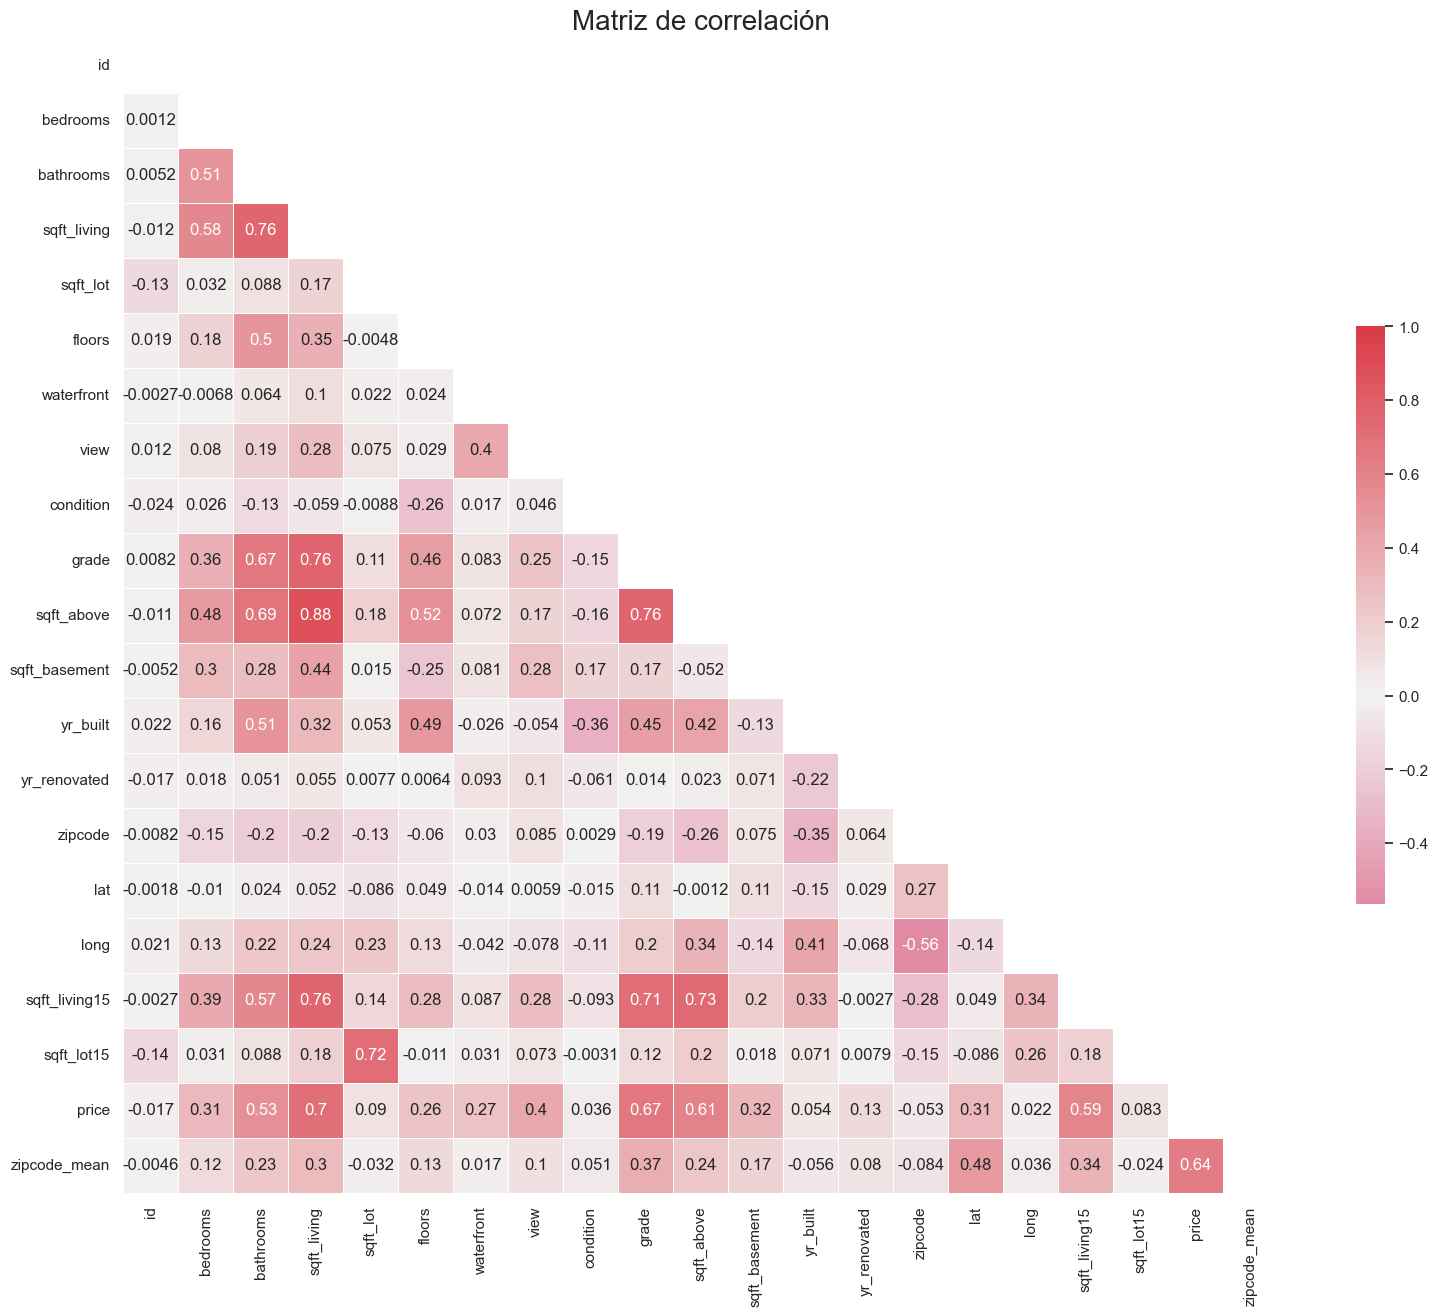

In [53]:
print_heatmap_corr(df, title='Matriz de correlación')

In [54]:
columns=['id','condition','waterfront','yr_built','yr_renovated','zipcode','long','sqft_lot15','sqft_lot','sqft_living','date']
df.drop(columns, axis=1, inplace=True)

Las columnas que hemos eliminado es o porque hay alguna columna con datos más actualizados o porque no guardaban relacion con nuestra columna precio viendolo en el dataset o simplemente viendolo a ojo, como puede sr el caso de date o id

Una vez eliminadas las columnas del dataset procedemos a hacer un diagrama de correlación

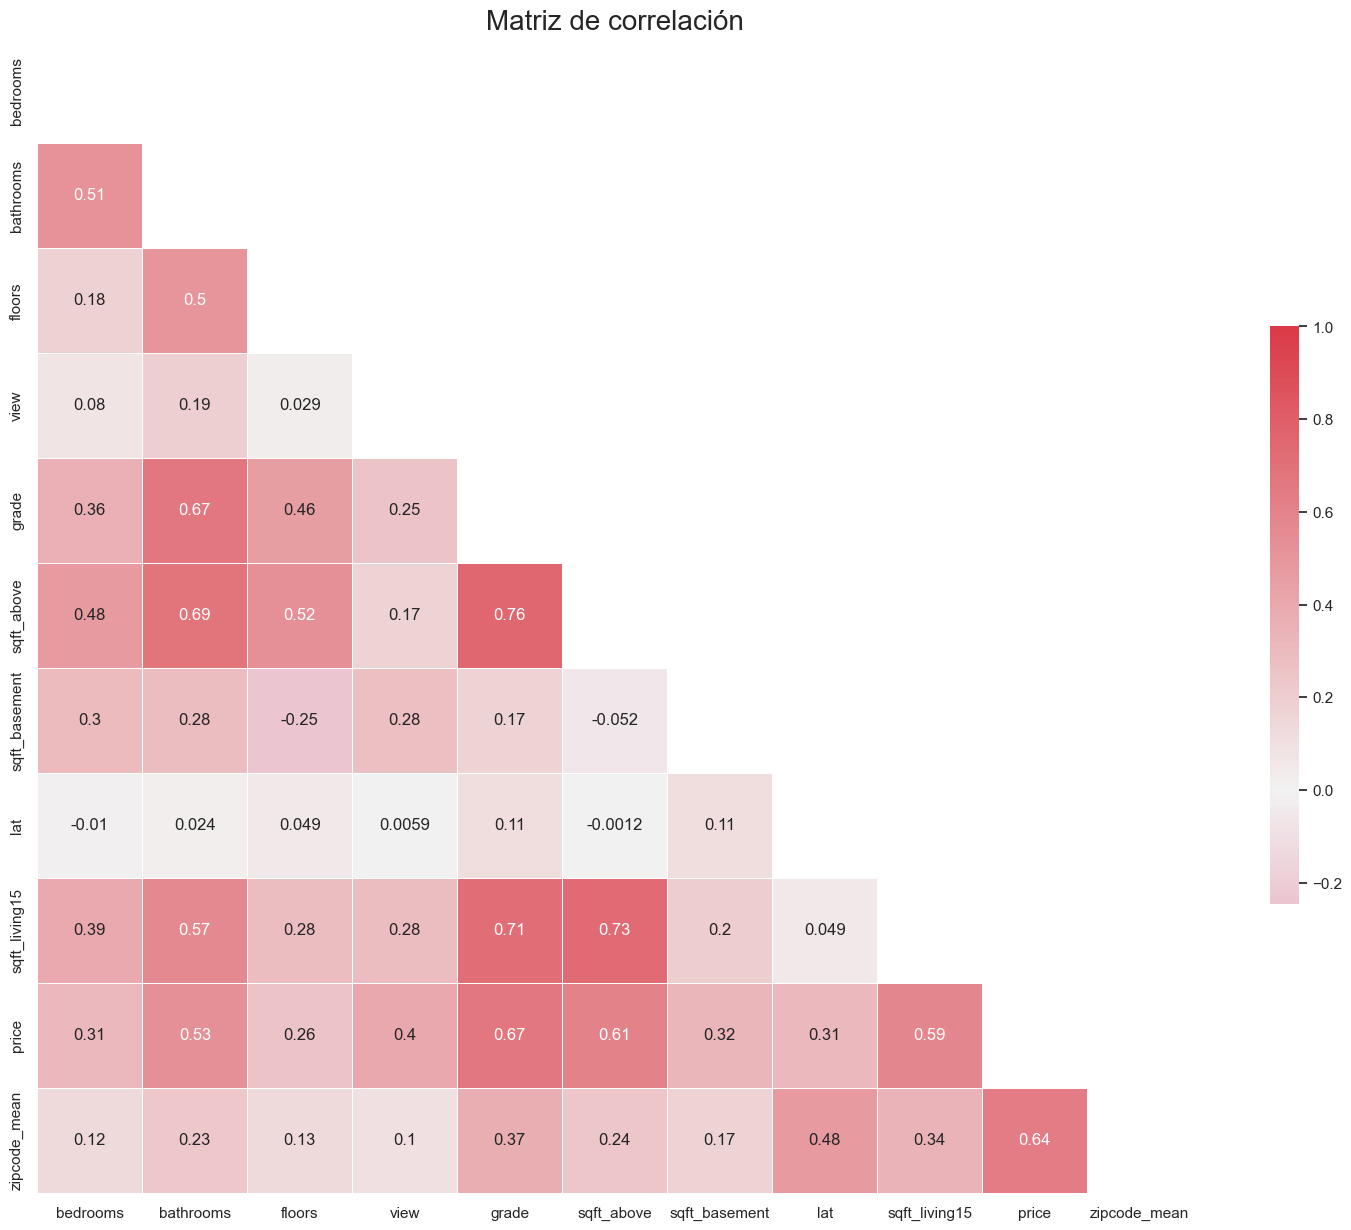

In [55]:
print_heatmap_corr(df, title='Matriz de correlación')


Como podemos ver la columna mas relacionada con `price` es `sqft_living`, después va `grade`, después `sqft_basement` y despues `sqft_living`.

Sabemos que `sqft_living` y `sqft_basement` se pueden juntar para conocer el terreno total

In [57]:
df['sqft_total'] = df['sqft_living15'] + df['sqft_basement']

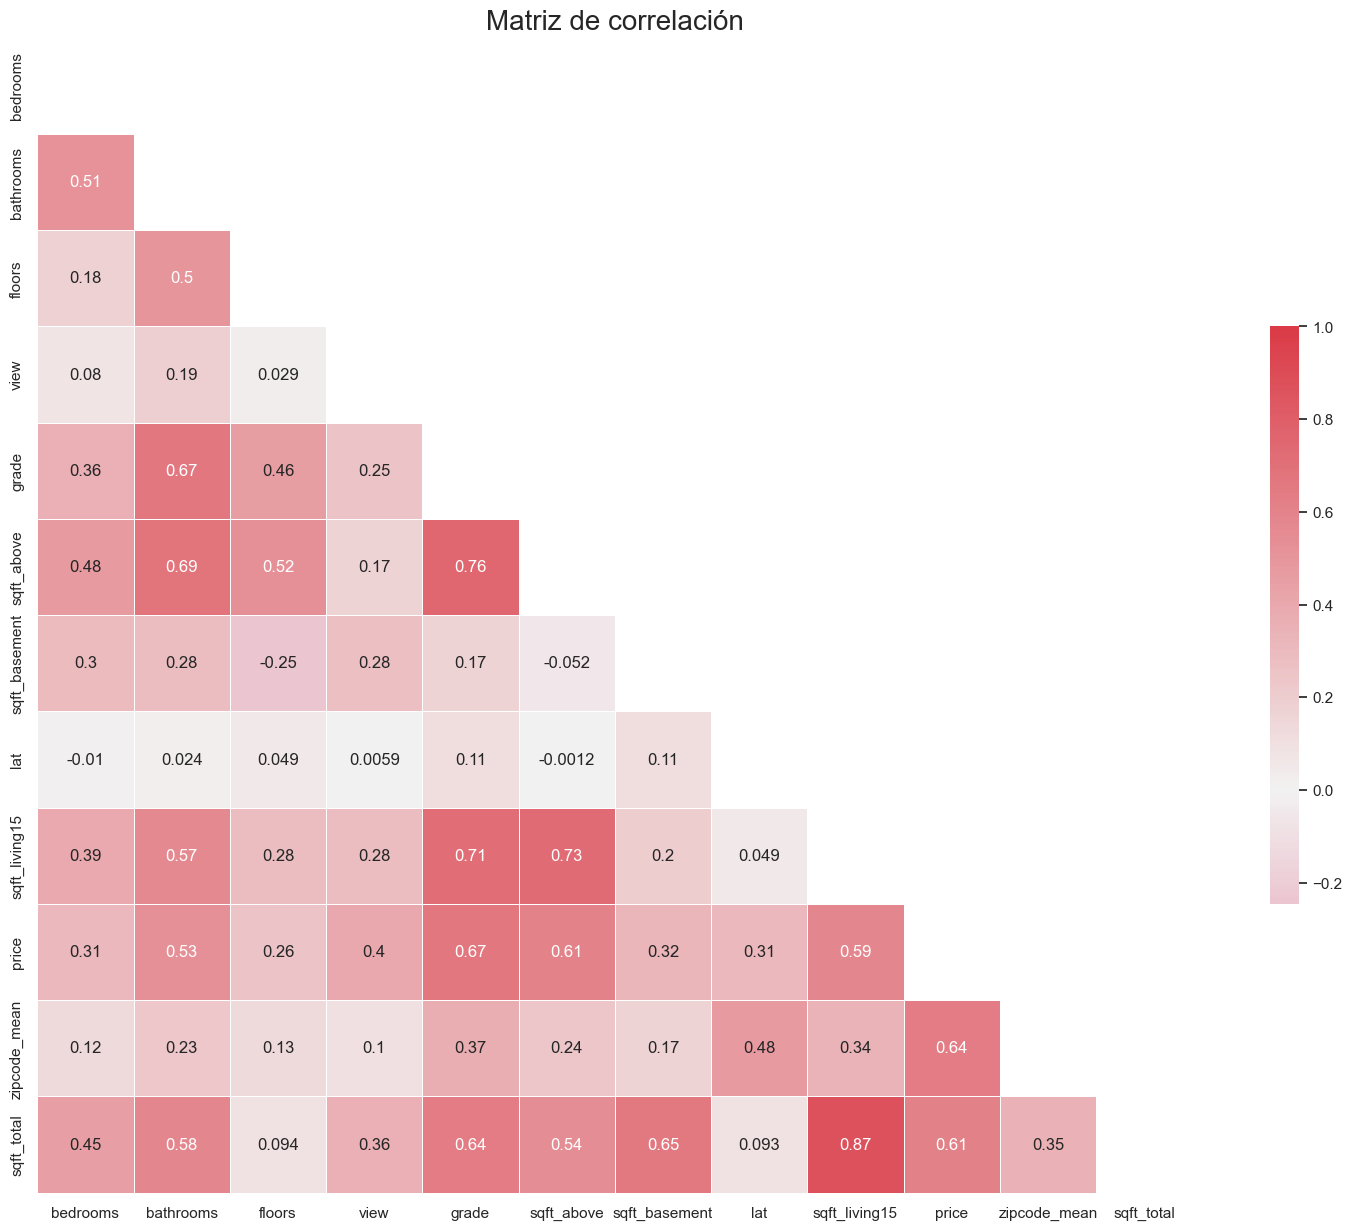

In [58]:
print_heatmap_corr(df, title='Matriz de correlación')

Como hemos visto la columna `sqft_total` muy relacionada con `sqft_living15` y `sqft_basement`, por lo que las eliminamos del dataset y nos quedamos con la total

In [59]:
cols=['sqft_living15','sqft_basement']
df.drop(cols, axis=1, inplace=True)

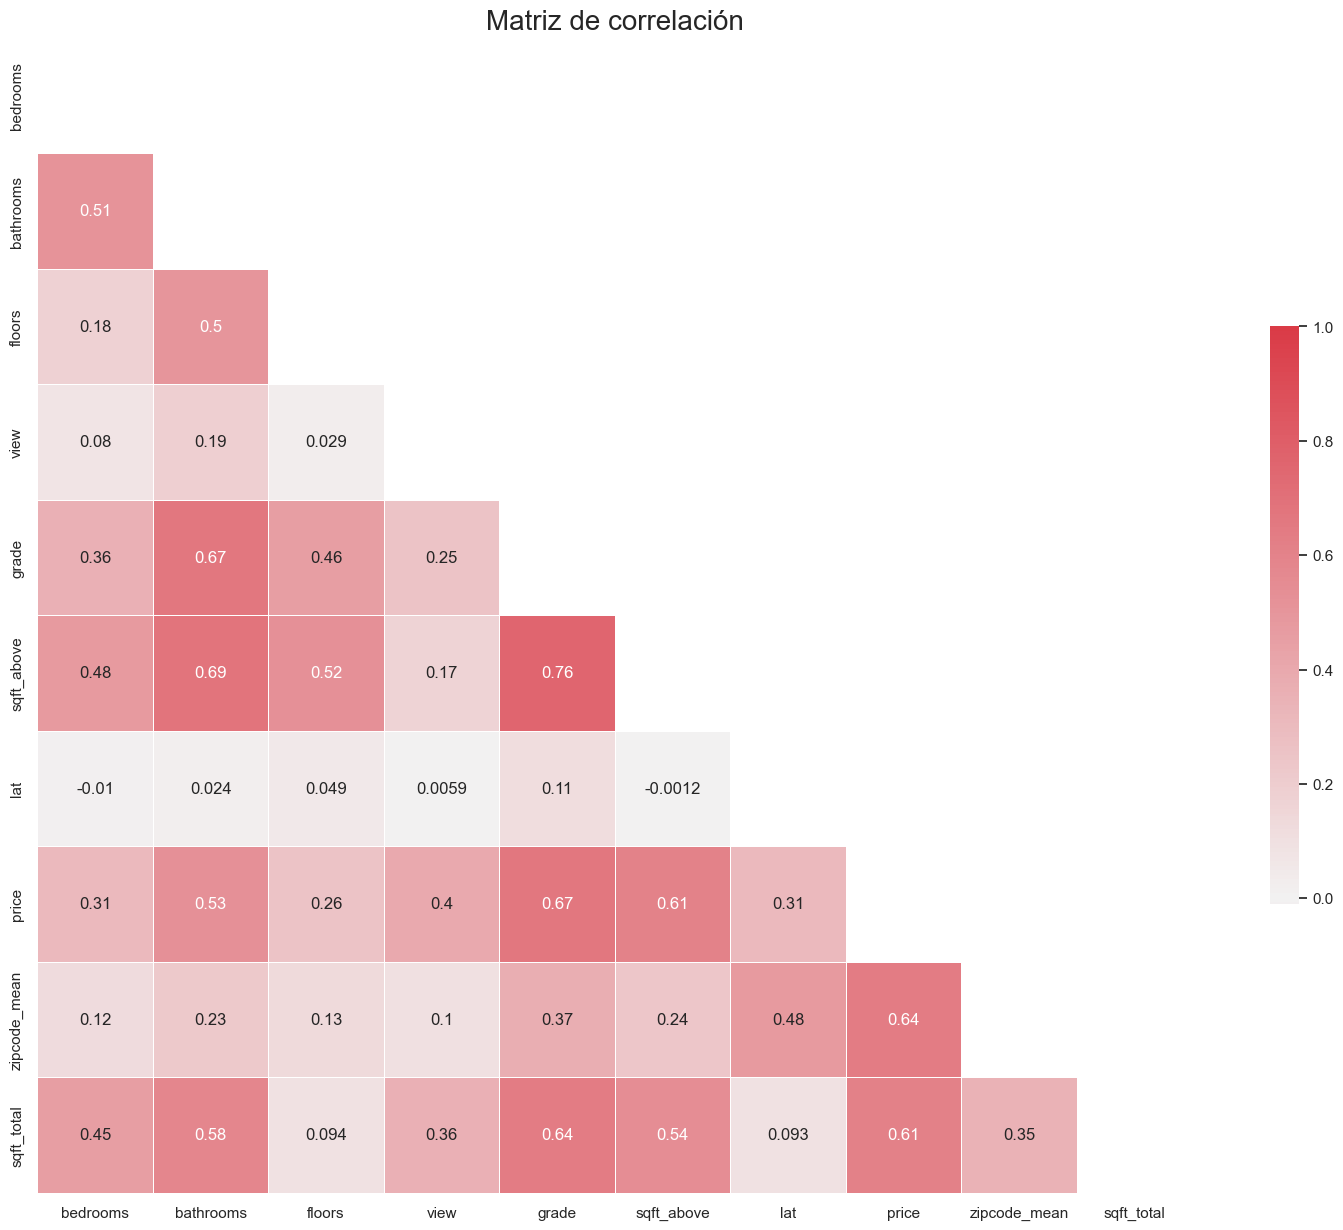

In [60]:
print_heatmap_corr(df, title='Matriz de correlación')

Ahora vamos a guardar el nuevo dataframe en un csv para poder trabajar con ellos en otro notebook

In [61]:
df.to_csv('data_cleaned/regression_data_clean.csv', index=False)